# Project: Encontrando Doadores

## Resumo do Projeto

Este projeto tem como intuito utilizar diversos algoritmos de aprendizado supervisionado para modelar com precisão a remuneração de indivíduos utilizando dados coletados no censo americano de 1994. O objetivo é construir um modelo que pode predizer com precisão se um indivíduo possui uma remuneração superior a $50,000 e, desta forma, direcionar os esforços de uma instituição de caridade para os indivíduos que possuem uma maior probabilidade de realizar uma doação.

O conjunto de dados para este projeto se origina do [Repositório de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income) e foi cedido por Ron Kohavi e Barry Becker, após a sua publicação no artigo _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_.

Na base de dados poderemos encontrar as seguintes informações:
* **age**: contínuo. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: contínuo. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: contínuo. 
* **capital-loss**: contínuo. 
* **hours-per-week**: contínuo. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Explorando os dados
A última coluna deste cojunto de dados, `'income'`, será o rótulo do nosso alvo (se um indivíduo possui remuneração igual ou maior do que $50,000 anualmente). Todas as outras colunas são dados de cada indívduo na base de dados do censo.

In [45]:
# Importando as bibliotecas necessárias para o projeto.
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Permite a utilização da função display() para DataFrames.
import visuals as vs # Importação da biblioteca de visualização visuals.py
import seaborn as sns # Biblioteca de visualização de dados estatísticos com base no matplotlib

# Exibição amigável para notebooks
%matplotlib inline

# Carregando os dados do Censo
data = pd.read_csv("census.csv")

# Exibindo os 10 primeiros registros
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


Aqui faremos uma investigação superficial da massa de dados que determinará quantos indivíduos se enquadram em cada grupo e nos dirá sobre o percentual destes indivúdos com remuneração anual superior à \$50,000.

In [46]:
# Número total de registros.
n_records = len(data)

# Número de registros com remuneração anual superior à $50,000
n_greater_50k = 0

# Número de registros com remuneração anual até $50,000
n_at_most_50k = 0

for income in data['income']:
    if income == '>50K':
        n_greater_50k += 1
    else:
        n_at_most_50k += 1

# Percentual de indivíduos com remuneração anual superior à $50,000
greater_percent = (n_greater_50k/n_records)*100

# Exibindo os resultados
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

# Gerando quadro com as estatísticas descritivas para as variáveis numéricas
data.describe()

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

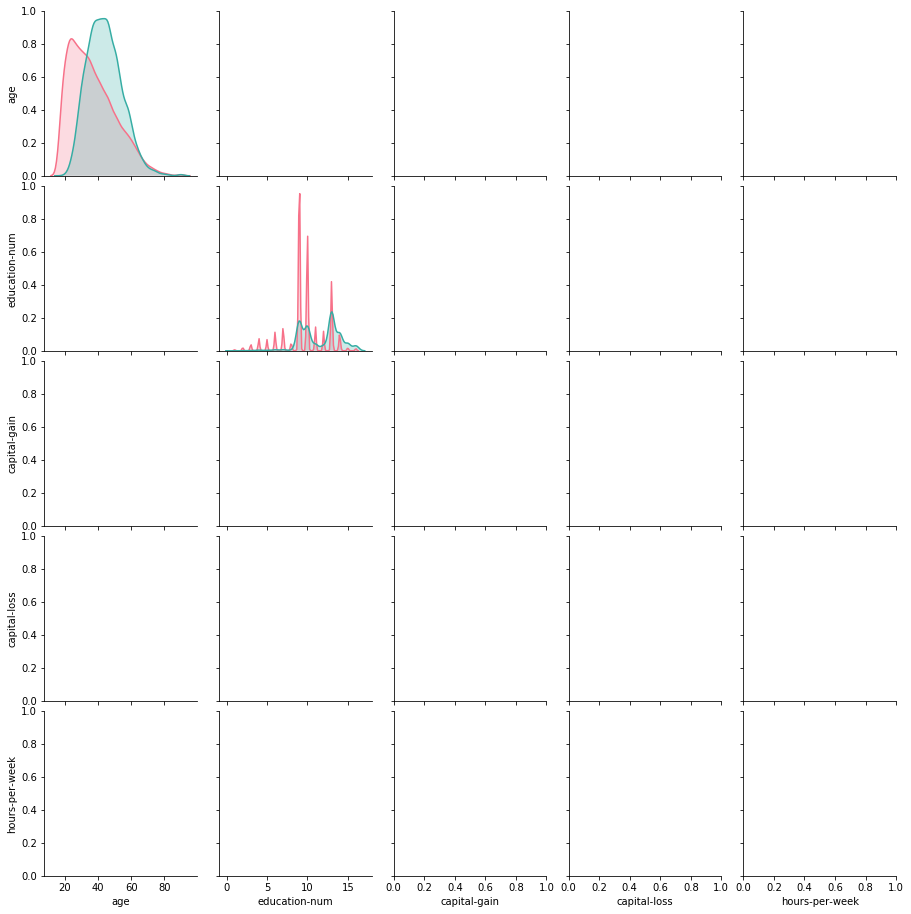

In [47]:
# Gerando gráficos comparativos
sns.pairplot(data, palette = 'husl', hue='income')

----
## Preparando os dados
Antes de utilizarmos os dados como input para algoritmos de Machine Learning é necessário que eles sejam tratados, formatados e reestruturados (etapa de **pré-processamento**). Esta etapa irá otimizar o resultado e poder de predição de quase todos os algoritmos de aprendizado.

### Transformando os principais desvios das colunas contínuas
Um conjunto de dados pode conter variáveis onde os valores tendem a se próximar para um único número, mas também pode conter registros onde o mesmo atributo possuí um valor muito maior ou muito menor do que esta tendência. Algorítmos podem ser sensíveis para estes casos de distribuição de valores e este fator pode prejudicar sua performance se a distribuição não estiver normalizada de maneira adequada. Com o conjunto de dados do censo, dois atributos se encaixam nesta descrição: '`capital-gain'` e `'capital-loss'`.

In [ ]:
# Dividindo os dados entre features e coluna alvo
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualizando os principais desvios das colunas contínuas entre os dados
vs.distribution(data)

Para atributos com distribuição muito distorcida iremos aplicar uma <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">transformação logarítmica</a> nos dados para que os valores muito grandes e muito pequenos não afetem a performance do algoritmo de aprendizado. Usar a transformação logarítmica reduz significativamente os limites dos valores afetados pelos outliers (valores muito grandes ou muito pequenos). Deve-se tomar cuidado ao aplicar esta transformação, poir o logaritmo de `0` é indefinido, portanto temos que incrementar os valores em uma pequena quantia acima de `0` para aplicar o logaritmo adequadamente.

In [ ]:
# Aplicando a transformação de log nos registros distorcidos.
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualizando as novas distribuições após a transformação.
vs.distribution(features_log_transformed, transformed = True)

### Normalizando atributos numéricos
Como boa prática vamos realizar algum tipo de adaptação de escala nos atributos numéricos. Ajustar a escala nos dados não modifica o formato da distribuição de cada coluna (tais como `'capital-gain'` ou `'capital-loss'` acima); no entanto, a normalização garante que cada atributo será tratado com o mesmo peso durante a aplicação de aprendizado supervisionado. Uma vez aplicada a escala, a observação dos dados não terá o significado original, como pode-se ver abaixo.

In [ ]:
# Importando sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Inicializando um aplicador de escala e aplicando em seguida aos atributos
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Exibindo um exemplo de registro com a escala aplicada
display(features_log_minmax_transform.head(n=5))

Podemos observar que em nosso conjunto de dados existem diversos atributos não-numéricos para cada registro. Usualmente, algoritmos de aprendizado esperam que os inputs sejam numéricos, o que requer que os atributos não numéricos (*variáveis categóricas*) sejam convertidos. Utilizaremos a estratégia **one-hot encoding**. Esta estratégia cria uma variável para cada categoria possível de cada atributo não numérico. Por exemplo, assuma que `algumAtributo` possuí três valores possíveis: `A`, `B`, ou `C`. Nós então transformamos este atributo em três novos atributos: `algumAtributo_A`, `algumAtributo_B` e `algumAtributo_C`.


|   | algumAtributo |                    | algumAtributo_A | algumAtributo_B | algumAtributo_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Além disso, assim como os atributos não-numéricos, precisaremos converter a coluna alvo não-numérica, `'income'`, para valores numéricos para que o algoritmo de aprendizado funcione. Uma vez que só existem duas categorias possíveis para esta coluna ("<=50K" e ">50K"), nós podemos evitar a utilização do one-hot encoding e simplesmente transformar estas duas categorias para `0` e `1`, respectivamente.

In [ ]:
# Realizando o one-hot encoding nos dados em 'features_log_minmax_transform' utilizando pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Realizando o encode da coluna 'income_raw' para valores numéricos
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)

# Exibe o número de colunas depois do one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Descomente a linha abaixo para ver as colunas após o encode
#print (encoded)

### Embaralhar e dividir os dados
Agora todas as _variáveis de categoria_ foram convertidas em atributos numéricos e todos os atributos numéricos foram normalizados. Então, agora dividiremos os dados entre conjuntos de treinamento e de teste. 80% dos dados serão utilizados para treinamento e 20% para teste.

In [ ]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir os 'atributos' e 'income' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Mostrar os resultados da divisão
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

----
## Avaliando a performance do modelo
Nesta seção nós investigaremos quatro algoritmos diferentes e determinaremos qual deles é melhor para a modelagem dos dados: Naive Predictor, Florestas Aleatórias, Bagging e SVM.

### Métricas e o Naive predictor

Sabemos que os indivíduos que fazem mais do que \$50,000 possuem uma maior probabilidade de doar para uma campanha de caridade. Por conta disto, iremos predizer com acurácia quais indivíduos possuem remuneração acima de \$50,000. Utilizar **acurácia (accuracy)** como uma métrica para avaliar a performance de um modelo é o parâmetro adequado porque identificar alguém que *não possui* remuneração acima de \$50,000 como alguém que recebe acima deste valor seria ruim para a *CharityML*, uma vez que eles estão procurando por indivíduos que desejam doar. Com isso, a habilidade do modelo em predizer com preisão aqueles que possuem a remuneração acima dos \$50,000 é *mais importante* do que a habilidade de realizar o **recall** destes indivíduos. Nós podemos utilizar a fórmula **F-beta score** como uma métrica que considera ambos: precision e recall.


### Métricas e o Naive predictor

Sabemos que os indivíduos que fazem mais do que 50,000 possuem maior probabilidade de doar para esta campanha de caridade. Por conta disto, estamos interessados em predizer com acurácia quais indivíduos possuem remuneração acima de 50,000.

Utilizaremos a **acurácia (accuracy)** como uma métrica para avaliar a performance do modelo porque não queremos direcionar os esforços da campanha para indivíduos que possuem uma remuneração abaixo deste valor. Com isso, a habilidade do modelo em predizer com precisão aqueles que possuem a remuneração acima dos \$50,000 é *mais importante* do que a habilidade de realizar o **recall** destes indivíduos. Iremos utilizar a fórmula **F-beta score** como uma métrica que considera ambos: precision e recall.


$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

Em particular, quando $\beta = 0.5$, maior ênfase é atribuída para a variável precision. Isso é chamado de **F$_{0.5}$ score** (ou F-score, simplificando).

Analisando a distribuição de classes (aqueles que possuem remuneração até 50,000 e aqueles que possuem remuneração superior), fica claro que a maioria dos indivíduos não possui remuneração acima de 50,000. Isto pode ter grande impacto na **acurácia (accuracy)**, uma vez que nós poderíamos simplesmente dizer *"Esta pessoa não possui remuneração acima de \$50,000"* e estar certos em boa parte das vezes, sem ao menos olhar os dados! Fazer este tipo de afirmação seria chamado de **naive**, uma vez que não consideramos nenhuma informação para balisar este argumento. É sempre importante considerar a *naive prediction* para seu conjunto de dados, para ajudar a estabelecer um benchmark para análise da performance dos modelos. Com isso, sabemos que utilizar a naive prediction não traria resultado algum: Se a predição apontasse que todas as pessoas possuem remuneração inferior à \$50,000, a *CharityML* não identificaria ninguém como potencial doador. 



#### Nota: Revisando: accuracy, precision e recall

Considere um problema onde você deve classificar se um email recebido deve ir ou não para a caixa de spam:

** Accuracy ** mede com que frequência o classificador faz a predição correta. É a proporção entre o número de predições corretas e o número total de predições (o número de registros testados).

** Precision ** informa qual a proporção de mensagens classificamos como spam eram realmente spam. Ou seja, é a proporção de verdadeiros positivos (mensagens classificadas como spam que eram realmente spam) sobre todos os positivos (todas as palavras classificadas como spam, independente se a classificação estava correta), em outras palavras, é a proporção

`[Verdadeiros positivos/(Verdadeiros positivos + Falso positivos)]`

** Recall(sensibilidade)** nos informa qual a proporção das mensagens que eram spam que foram corretamente classificadas como spam. É a proporção entre os verdadeiros positivos (classificados como spam, que realmente eram spam) sobre todas as palavras que realmente eram spam. Em outras palavras, é a proporção entre

`[Verdadeiros positivos/(Verdadeiros positivos + Falso negativos)]`

Para problemas de classificação distorcidos em suas distribuições, como no nosso caso, por exemplo, se tivéssemos 100 mensagems de texto e apenas 2 fossem spam e todas as outras não fossem, a "accuracy" por si só não seria uma métrica tão boa. Nós poderiamos classificar 90 mensagems como "não-spam" (incluindo as 2 que eram spam mas que teriam sido classificadas como não-spam e, por tanto, seriam falso negativas.) e 10 mensagems como spam (todas as 10 falso positivas) e ainda assim teriamos uma boa pontuação de accuracy. Para estess casos, precision e recall são muito úteis. Estas duas métricas podem ser combinadas para resgatar o F1 score, que é calculado através da média(harmônica) dos valores de precision e de recall. Este score pode variar entre 0 e 1, sendo 1 o melhor resultado possível para o F1 score (consideramos a média harmônica pois estamos lidando com proporções).

### Performance do Naive Predictor
* Agora iremos criar um modelo que sempre prediz que um indivíduo possui remuneração acima de $50,000.

** O propósito ao gerar um naive predictor é simplesmente exibir como um modelo sem nenhuma inteligência se comportaria. No mundo real, idealmente o seu modelo de base será o resultado de um modelo anterior ou poderia ser baseado em um paper no qual você se basearia para melhorar. Quando não houver qualquer benchmark de modelo, utilizar um naive predictor será melhor do que uma escolha aleatória.

* Quando temos um modelo que sempre prediz '1' (e.x o indivíduo possui remuneração superior à 50k) então nosso modelo não terá Verdadeiros Negativos ou Falso Negativos, pois nós não estaremos afirmando que qualquer dos valores é negativo (ou '0') durante a predição. Com isso, nossa accuracy neste caso se torna o mesmo valor da precision (Verdadeiros positivos/ (Verdadeiros positivos + Falso positivos)) pois cada predição que fizemos com o valor '1' que deveria ter o valor '0' se torna um falso positivo; nosso denominador neste caso é o número total de registros.
* Nossa pontuação de Recall(Verdadeiros positivos/(Verdadeiros Positivos + Falsos negativos)) será 1 pois não teremos Falsos negativos.

In [ ]:
'''
TP = Este é o caso "naive". Note que 'income' são os dados 'income_raw' convertidos
para valores numéricos durante o passo de pré-processamento de dados.
FP = Específico para o caso naive
TN = Sem predições negativas para o caso naive
FN = Sem predições negativas para o caso naive
'''
# Calcular accuracy, precision e recall
TP = float(np.sum(income))
FP = float(income.count() - TP)
TN = 0
FN = 0

accuracy = float((TP + FN)/ (TP + FP + TN + FN))
recall = float(TP / (TP + FN))
precision = float(TP/(TP+FP))
b = 0.5
#Calcular o F-score utilizando a fórmula acima para o beta = 0.5 e os valores corretos de precision e recall.
fscore = (1+b**2) * (precision * recall) / (b**2*precision + recall)

# Exibir os resultados 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

###  Modelos de Aprendizado Supervisionado
**Estes são alguns dos modelos de aprendizado supervisionado disponíveis em** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees (Árvores de decisão)
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Aplicação do Modelo
Liste três dos modelos de aprendizado supervisionado acima que são apropriados para este problema que você irá testar nos dados do censo. Para cada modelo escolhido

- Descreva uma situação do mundo real onde este modelo pode ser utilizado. 
- Quais são as vantagems da utilização deste modelo; quando ele performa bem?
- Quais são as fraquez
as do modelo; quando ele performa mal?
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?

** DICA: **

Estruture sua resposta no mesmo formato acima^, com 4 partes para cada um dos modelos que você escolher. Por favor, inclua referências em cada uma das respostas.

Iremos treinar os dados com base nestes 3 modelos de aprendizagem supervisionada:

**Florestas Aleatórias**
1. Este método pode ser utilizado em problemas onde há a necessidade de segmentação do cluster, por exemplo, na criação de perfis no Spotify que guiem a sugestão da música mais apropriada para um indivíduo;
2. Por meio de perguntas binárias, este modelo vai criando uma árvore de decisão que conforme recebe as respostas conduz para um determinado resultado. Diferentemente da Árvore de Decisão, ele combina diversas árvores com o intuito de saber quais Features resumem melhor os dados. Por isto, é recomendado para bases que possuímos muitas categorias.
3. Como ponto negativo temos o fato que quando a árvore começa ramificar muito (aumentar sua profundidade), há um risco de sobreposição, não generalizando bem os dados.
4. Podemos utilizar este método para o nosso problema porque ele permite analisar as Features que temos e definir quais indivíduos devem receber a carta de pedido de doação. Além disto, a quantidade de dados e o fato da maioria das Features serem categóricas, reforçam a escolha do modelo

**Bagging**
1. Neste método, vários 'strong learners' (estimadores próximos ao overfitting) são agrupadas com o intuito de criar um preditor melhor. No mundo real pode ser utilizado junto com SVM, Regressão ou outro método que exija um modelo mais estável, por exemplo, na concessão de crédito ao consumidor.
2. Atua combinando estimadores de alta variância e, desta forma, diminui a variância total através da média ou do método major vote.
3. Em procedimentos estáveis, o preditor bagging não traz melhora e pode até ter desempenho pior. 
4. Esta técnica pode ser utilizada para minimizar as chances de construirmos um modelo overfitting e, consequentemente, economizar no envio de correspondências para pessoas fora do perfil. 

**SVM**
1. É uma ferramente de classificação e análise de regressão dos dados que também auxilia no separação do melhor limite entre os hiperplanos considerando a minimização do erro (erro de classificação + magem de erro)
2. Funciona muito bem em domínios complicados, em que existe uma clara margem de separação. É eficaz em espaços dimensionais elevados e bastante versátilpor conta das diferentes funções de Kernel que podem ser espicificadas;
3. Grandes conjuntos de dados irão exigir uma alta complexidade operacional e também não funciona bem em conjuntos com muitos ruídos.
4. Como temos um problema de classificação e uma base não tão grande, o SVM poderá nos ajudar a separar os potenciais doadores da população restante.

### Criando um Pipeline de Treinamento e Predição
Para avaliar adequadamente a performance de cada um dos modelos que você escolheu é importante que você crie um pipeline de treinamento e predição que te permite de maneira rápida e eficiente treinar os modelos utilizando vários tamanhos de conjuntos de dados para treinamento, além de performar predições nos dados de teste.

In [ ]:
# Importando fbeta_score e accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Adapta o algoritmo para os dados de treinamento e registra o tempo de treinamento.
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    results['train_time'] = end - start
        
    # Realiza as predições nos dados de teste X_test, e também nos 300 primeiros pontos de treinamento X_train[:300]
    start = time() # Start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # End time
    
    # Calcula o tempo total de predição
    results['pred_time'] = end - start
            
    # Computa a Acuracia das 300  primeiras amostras de treino - y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Computa a acuracia do conjunto de teste utilizando accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Computa o F-score das 300  primeiras amostras de treino - fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300] , predictions_train, beta = 0.5)
        
    # Computa F-score ono conjunto de teste que é y_test
    results['f_test'] = fbeta_score(y_test , predictions_test, beta = 0.5)
       
    # Mostra resultados
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Validação inicial do modelo
Agora iremos realizar as seguintes etapas:
- Importar os três modelos de aprendizado supervisionado  
- Inicializar os três modelos e armazená-los em `'clf_A'`, `'clf_B'`, e `'clf_C'`. 
- Calcular o número de registros equivalentes à 1%, 10%, e 100% dos dados de treinamento.

In [ ]:
# Importando os três modelos de aprendizado supervisionado da sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Inicializando os três modelos
clf_A = RandomForestClassifier(random_state = 10)
clf_B = BaggingClassifier (random_state = 10)
clf_C = SVC (random_state = 10)

# Calculando o número de amostras para 1%, 10%, e 100% dos dados de treinamento
samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

# Coletando os resultados dos algoritmos de aprendizado
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Gerando gráficos de visualização para os 3 modelos
vs.evaluate(results, accuracy, fscore)

----
## Melhorando os resultados
Nesta seção iremos escolher o melhor entre os três modelos de aprendizado supervisionado.

### Escolhendo o melhor modelo

Antes de escolher o modelo vamos entender o significado do score.
Quando um modelo possuí um score alto, quer dizer que ele possuí uma alta variância (overfitting), ou seja, ele se ajusta muito bem aos dados de teste, pondendo capturar inclusive os ruídos como se estivesse decorando os dados, pode ter problemas para se adaptar à novos dados.

Já modelos com um score baixo (underfitting) são muito genéricos e falham em captar a variância dos dados.
A primeira informação que temos é que o método SVC demanda uma capacidade operacional muito superior às outras ferramentas, junto a isto ainda há o fato de ter a Accuracy e o F-score baixos para os dados de treino, sendo então o primeiro a ser descartado.

Entre o método Bagging e Florestas Aleatórias os resultados são muito parecidos, chegando em um Accuracy próximo de 100% nos dados de treino e ~80% nos dados de teste, enquanto o tempo de processamento fica abaixo de 1 segundo. Por isto, para escolher o melhor modelo será utilizado como fator de desempate a adequação do algoritmo para este conjunto.
Portanto, o modelo escolhido é Florestas Aleatórios que suporta a análise em conjunto de diversas features categóricas, além de se adaptar ao tamanho da base que temos.

### Entendendo mais sobre o modelo

O método Florestas Aleatórias é muito utilizado quando queremos segmentar e classificar os usuários em perfis, no nosso caso: Potenciais Doadores e Não Doadores. 

Por meio de análises estatísticas, todas as características disponíveis na base como sexo, idade, nível de educação, ocupação, etc. são analisadas em conjunto pelo próprio modelo por meio de perguntas que possuem resposta binárias (sim/não). Por exemplo, para analisar a característica Idade o sistema poderá fazer a pergunta "Este cliente tem uma idade maior que 40 anos?" e, se ao analisar a base toda houver uma confirmação que há um padrão e esta é uma característica relevante para classificar um doador, então ela será considerada para as futuras predições, podendo também ser combinadas com outras como: maior que 40 anos e do sexo feminino. 

No nosso caso, como temos diversas características que podem criar inúmeros perfis diferentes de doadores, nós criaremos várias árvores de decisão diferentes e, combinando elas, temos quais são os perfis que melhor se enquadram os potenciais doadores da CharityML.

Abaixo um exemplo de uma Floresta Aleatória:

![title](img/florest.png)

### Refinando o modelo
Refine o modelo escolhido. Utilize uma busca grid (`GridSearchCV`) com pelo menos um parâmetro importante refinado com pelo menos 3 valores diferentes. Você precisará utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você precisará implementar o seguinte:
- Importar [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Inicializar o classificador escolhido por você e armazená-lo em `clf`.
 - Configurar um `random_state` se houver um disponível para o mesmo estado que você configurou anteriormente.
- Criar um dicionário dos parâmetros que você quer otimizar para o modelo escolhido.
 - Exemplo: `parâmetro = {'parâmetro' : [lista de valores]}`.
 - **Nota:** Evite otimizar o parâmetro `max_features` se este parâmetro estiver disponível! 
- Utilize `make_scorer` para criar um objeto de pontuação `fbeta_score` (com $\beta = 0.5$).
- Realize a busca gride no classificador `clf` utilizando o `'scorer'` e armazene-o na variável `grid_obj`.   
- Adeque o objeto da busca grid aos dados de treino (`X_train`, `y_train`) e armazene em `grid_fit`.

**Nota:** Dependendo do algoritmo escolhido e da lista de parâmetros, a implementação a seguir pode levar algum tempo para executar! 

In [48]:
# Importando 'GridSearchCV', 'make_scorer' e RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

# Inicializando o classificador
clf = RandomForestClassifier(random_state = 10)

# Criando a lista de parâmetros para otimizar.
parameters =  {
                "min_samples_split" : [2,4,6,8],
                "min_samples_leaf" : [1, 2, 3, 4, 5, 6, 7, 10],
                "criterion": ["gini","entropy"],
                "n_estimators": [13]
              }

# Criando um objeto fbeta_score utilizando make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Realizando uma busca grid no classificador utilizando o 'scorer' como o método de score no GridSearchCV() 
grid_obj = GridSearchCV(clf, parameters, scoring = scorer, verbose=100)

# Adequando o objeto da busca grid como os dados para treinamento e encontrar os parâmetros ótimos utilizando fit() 
grid_fit = grid_obj.fit(X_train, y_train)

# Recuperando o estimador
best_clf = grid_fit.best_estimator_

# Realizando predições utilizando o modelo não otimizado e modelar
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Reportando os scores de antes e de depois
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=13, score=0.674, total=   0.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=13, score=0.674, total=   0.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=13, score=0.666, total=   0.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=

[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=6, n_estimators=13, score=0.726, total=   0.6s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   22.3s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=2, min_samples_split=6, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=6, n_estimators=13, score=0.734, total=   0.6s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   22.9s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=2, min_samples_split=6, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=6, n_estimators=13, score=0.727, total=   0.6s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   23.5s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=2, min_samples_split=6, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=6, n_estimators=13, score=0.729, total=   0.6s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   24.1s remaining:    0.0s
[CV] criterion=

[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.739, total=   0.6s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   40.6s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.727, total=   0.6s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   41.1s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.723, total=   0.6s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   41.7s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.729, total=   0.6s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   42.3s remaining:    0.0s
[CV] criterion=

[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=6, n_estimators=13, score=0.730, total=   0.6s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   58.0s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=6, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=6, n_estimators=13, score=0.720, total=   0.6s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   58.6s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=6, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=6, n_estimators=13, score=0.732, total=   0.5s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   59.2s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=13, score=0.725, total=   0.5s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   59.7s remaining:    0.0s
[CV] criterion=

[CV]  criterion=gini, min_samples_leaf=7, min_samples_split=6, n_estimators=13, score=0.732, total=   0.5s
[CV] criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13, score=0.723, total=   0.5s
[CV] criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13, score=0.730, total=   0.6s
[CV] criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13, score=0.725, total=   0.5s
[CV] criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13, score=0.722, total=   0.5s
[CV] criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estimators=13 
[CV]  criterion=gini, min_samples_leaf=7, min_samples_split=8, n_estim

[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=13, score=0.714, total=   0.7s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=13, score=0.718, total=   0.7s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.724, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.729, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.730, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  criterion=entropy, min_samples_lea

[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.731, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.717, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.732, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.736, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=4, n_estimators=13, score=0.723, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_lea

[CV]  criterion=entropy, min_samples_leaf=6, min_samples_split=2, n_estimators=13, score=0.722, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13, score=0.730, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13, score=0.741, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13, score=0.724, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13, score=0.729, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=6, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_lea

[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=13, score=0.722, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=13, score=0.724, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=4, n_estimators=13, score=0.737, total=   0.6s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=6, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=6, n_estimators=13, score=0.720, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=6, n_estimators=13 
[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=6, n_estimators=13, score=0.738, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=6, n_estimators=13 
[CV]  criterion=entropy, min_s

### Validação final do modelo

Antes da implementação do modelo, se escolhessemos um registro ao acaso, teríamos uma probabilidade de 24,78% de obter um doador. Após a análise utilizando Florestas Aleatórias este valor passa uma Accuracy de 85,64% e F-score 66,96, provando-se bastante superior

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    84.20%         |   85,90%        |
| F-score        |    68.02%         |   72,85%        |


----
## Importância dos atributos

Uma tarefa importante quando realizamos aprendizado supervisionado em um conjunto de dados como os dados do censo que estudamos aqui é determinar quais atributos fornecem maior poder de predição. Focando no relacionamento entre alguns poucos atributos mais importantes e na label alvo nós simplificamos muito o nosso entendimento do fenômeno, que é a coisa mais importante a se fazer. No caso deste projeto, isso significa que nós queremos identificar um pequeno número de atributos que possuem maior chance de predizer se um indivíduo possui renda anual superior à \$50,000.

### Implementação - Extraindo a importância do atributo
Escolha um algoritmo de aprendizado supervisionado da `sciki-learn` que possui o atributo `feature_importance_` disponível. Agora utilizaremos o atributo `feature_importance_` que é uma função que ranqueia a importância de cada atributo dos registros do conjunto de dados quando realizamos predições baseadas no algoritmo escolhido.

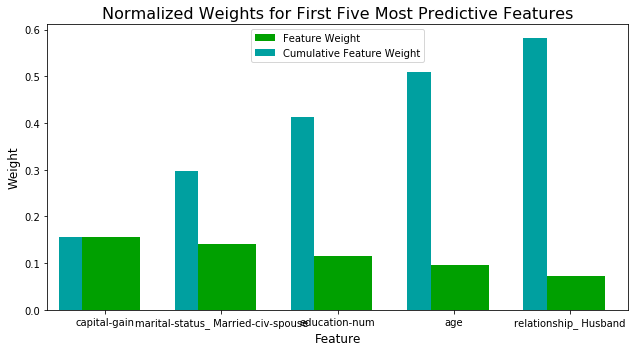

In [51]:
# Treinando o modelo utilizando o conjunto de treinamento com .fit(X_train, y_train)
model = clf.fit(X_train, y_train)

# Extraindo a importância dos atributos utilizando .feature_importances_ 
importances = model.feature_importances_

# Plotar no gráfico
vs.feature_plot(importances, X_train, y_train)

### Observação da Relevância dos Atributos
Quando **Exploramos os dados**, vimos que existem treze atributos disponíveis para cada registro nos dados do censo. Dos 13 atributos os 5 abaixo são os mais relevantes:
1. Capital-gain: quanto maior o salário, maior a probabilidae de doações;
2. Marital Status: pessoas que constroem uma família tem uma maior predisposição a doar;
3. Education: Quanto maior o grau de educação, mais se entende a necessidade de ajudar ao próximo;
4. Age: pessoas mais velhas tendem a ajudar mais o próximo;
5. Relationship: demonstrando que pessoas casadas são mais propensas à doação.

### Selecionando atributos

A partir da visualização acima, nós vemos que os cinco atributos mais importantes contribuem para ~60% da importância de **todos** os atributos presentes nos dados. Isto indica que nós podemos tentar *reduzir os atributos* e simplificar a informação necessária para o modelo aprender em um tempo muito menor. O código abaixo utilizará o mesmo modelo otimizado que encontramos anteriormente e treinará o modelo com o mesmo conjunto de dados de treinamento, porém apenas com *os cinco atributos mais importantes*

In [52]:
# Importar a funcionalidade para clonar um modelo
from sklearn.base import clone

# Reduzir a quantidade de atributos
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Treinar o melhor modelo encontrado com a busca grid anterior
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Fazer novas predições
reduced_predictions = clf.predict(X_test_reduced)

# Reportar os scores do modelo final utilizando as duas versões dos dados.
print ("Final Model trained on full data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8590
F-score on testing data: 0.7285

Final Model trained on reduced data
------
Accuracy on testing data: 0.8446
F-score on testing data: 0.6913


Text(0.5, 24.0, 'Predicted')

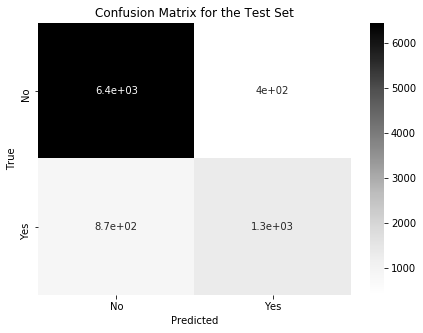

In [53]:
import seaborn as sns # Install using 'pip install seaborn'
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm_test = confusion_matrix(y_test, best_clf.predict(X_test))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

### Questão 8 - Efeitos da seleção de atributos

A accuracy e o F-score tiveram um ligeiro recuo ao utilizar a base apenas com as principais features. Portanto, a base enxuta só deveria ser utilizada se fosse necessário treinar os dados numa frequência alta. Como no nosso problema este conjunto de dados não seria treinado com muita frequência, é recomendado que utilize a base completa para uma maior precisão.
